# Floating point arithmetic

1. The Machine epsilon $\epsilon$ is defined as the smallest floating point number such that it holds: 
   $$ fl(1 + \epsilon) > 1 $$  
   Compute $\epsilon$. *Tips: use a `while` structure.*

2. Let's consider the sequence $ a_n = \left( 1 + \frac{1}{n} \right)^n $. It is well known that: 
   $$ \lim_{n \to \infty} a_n = e $$ 
   where $ e $ is the Nepere number.  
   Choose different values for $n$, compute $a_n$ and compare it to the real value of the Nepere number. What happens if you choose a large value of $n$?

3. Let's consider the matrices:
   
   $$ A = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix} \quad B = \begin{bmatrix} 4 & 2 \\ 2 & 1 \end{bmatrix} $$

   Compute the rank of $A$ and $B$ and their eigenvalues. Are $A $ and $B$ full-rank matrices?  
   Can you infer some relationship between the values of the eigenvalues and the full-rank condition?  
   Please, corroborate your deduction with other examples.  
   *Tips: Please, have a look at `np.linalg`.*

1. The Machine epsilon $\epsilon$ is defined as the smallest floating point number such that it holds: 
   $$ fl(1 + \epsilon) > 1 $$  
   Compute $\epsilon$. *Tips: use a `while` structure.*

In [14]:
import numpy as np

In [15]:
epsilon = 1.0

# definition of machine epsilon
while (1 + epsilon) > 1:
    epsilon /= 2

# as we stopped the while when epsilon was too small, we "backtrack" to the previous one:
epsilon *= 2
print(f"The machine epsilon is {epsilon}") 

# comparison with true machine epsilon:
true_epsilon = np.finfo(float).eps
print(f"The true machine epsilon is: {true_epsilon}")

The machine epsilon is 2.220446049250313e-16
The true machine epsilon is: 2.220446049250313e-16


2. Let's consider the sequence $ a_n = \left( 1 + \frac{1}{n} \right)^n $. It is well known that: 
   $$ \lim_{n \to \infty} a_n = e $$ 
   where $ e $ is the Nepere number.  
   Choose different values for $n$, compute $a_n$ and compare it to the real value of the Nepere number. What happens if you choose a large value of $n$?

In [16]:
import matplotlib.pyplot as plt
import math

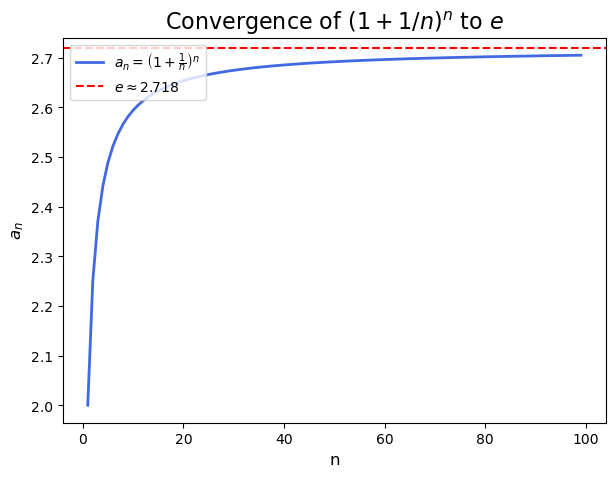

In [24]:
# Nepere number
e_value = math.e

n_values = range(1,100)
an_values = []

# compute a_n for different values of n, from 1 to 100
for n in n_values:
    a_n = math.pow(1 + 1/ n, n)
    an_values.append(a_n)


# Plot
plt.figure(figsize=(7,  5))
plt.plot(n_values, an_values, label=r'$a_n = \left(1 + \frac{1}{n}\right)^n$', color='royalblue', linewidth=2)

# Adding horizontal line for e
plt.axhline(y=e_value, color='red', linestyle='--', label=r'$e \approx' + f'{e_value:.3f}$')

# Title and labels
plt.title("Convergence of " + r'$(1 + 1/n)^n$' + " to " +  r'$e$', fontsize=16)
plt.xlabel('n', fontsize=12)
plt.ylabel(r'$a_n$', fontsize=12)

# Grid and legend
plt.legend(loc='upper left')

plt.show()

## Consideration
It seems that the more n increases, the more $a_n$ gets closer to the nepere number. Indeed, as we can see from the graph, the sequence $a_n$ converges to the Nepere number $e$.

Of course, this result is what we are expecting, since    $$ \lim_{n \to \infty} a_n = e $$ 

3. Let's consider the matrices:
   
   $$ A = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix} \quad B = \begin{bmatrix} 4 & 2 \\ 2 & 1 \end{bmatrix} $$

   Compute the rank of $A$ and $B$ and their eigenvalues. Are $A $ and $B$ full-rank matrices?  
   Can you infer some relationship between the values of the eigenvalues and the full-rank condition?  
   Please, corroborate your deduction with other examples.  
   *Tips: Please, have a look at `np.linalg`.*

In [18]:
# matrix definitions
A = np.array([[4,2], [1,3]])
B = np.array([[4,2], [2,1]])

# compute the rank of each matrix
A_rank = np.linalg.matrix_rank(A)
B_rank = np.linalg.matrix_rank(B)

print(f"rank of matrix A is {A_rank}, rank of matrix B is {B_rank}")

# compute the eigenvalues of each matrix
A_eigenvalues = np.linalg.eigvals(A)
B_eigenvalues = np.linalg.eigvals(B)

print(f"The eigenvalues of matrix A are {A_eigenvalues}, the eigenvalues of matrix B are {B_eigenvalues}")

rank of matrix A is 2, rank of matrix B is 1
The eigenvalues of matrix A are [5. 2.], the eigenvalues of matrix B are [5. 0.]


### Are $A $ and $B$ full-rank matrices?  
A matrix $A$ is a full-rank matrix if its rank is equal to the minimum between the number of rows and columns of $A$.

Therefore, $A$ is full rank if: 
$$ rank_A = \min(n,m) $$ 
where $A\in R^{n\times m}$

In [19]:
nA, mA = A.shape
nB, mB = B.shape

if (A_rank == min(nA,mA)):
    print("Matrix A is full-rank")
else:
    print("Matrix A is not full-rank")

if (B_rank == min(nB,mB)):
    print("Matrix B is full-rank")
else:
    print("Matrix B is not full-rank")

Matrix A is full-rank
Matrix B is not full-rank


Can you infer some relationship between the values of the eigenvalues and the full-rank condition?  
    As we have seen from the previous case, if the matrix is squared (like $A$ and $B$), then: 
- $A$ has all non-zero eigenvalues therefore it is full-rank.
- $B$ has at least one zero eigenvalues and so it's not full rank.

Indeed:
- If a square matrix $A$ has at least one eigenvalue equal to zero, it means the matrix is not invertible (since its determinant will be equals to zero) and therefore not full-rank. 
    
    Indeed, since the determinant of a matrix is equal to the product of its eigenvalues, if one of its eigenvalues is zero, the determinant of that matrix will be zero.
- If a square matrix has all non-zero eigenvalues, it is full-rank and invertible.

### Examples
Full-rank matrix:
$$ C = \begin{bmatrix} 1 & 2 & 3 \\ 0 & 4 & 5 \\ 1 & 0 & 6 \end{bmatrix} $$

Non full-rank matrix:
$$ D = \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 1 \\ 0 & 1 & 1 \end{bmatrix} $$

In [25]:
# -- FULL RANK MATRIX --
C = np.array([[1,2,3], [0,4,5], [1,0,6]])
C_rank = np.linalg.matrix_rank(C)

print(f"The rank of matrix C is {C_rank}")

C_eigenvalues = np.linalg.eigvals(C)
print(f"The eigenvalues of matrix C are {C_eigenvalues}")

nC, mC = C.shape
if (C_rank == min(nC,mC)):
    print("Matrix C is full-rank, because all its eigenvalues are different from zero")
else:
    print("Matrix C is not full-rank, because it has at least one eigenvalue equal to zero")
    
    
# -- NON FULL RANK MATRIX --
D = np.array([[1,0,1], [0,1,1], [0,1,1]])
D_rank = np.linalg.matrix_rank(D)

print(f"\nThe rank of matrix D is {D_rank}")

D_eigenvalues = np.linalg.eigvals(D)
print(f"The eigenvalues of matrix D are {D_eigenvalues}")

nD, mD = D.shape
if (D_rank == min(nD,mD)):
    print("Matrix D is full-rank, because all its eigenvalues are different from zero")
else:
    print("Matrix D is not full-rank, because it has at least one eigenvalue equal to zero")
    
    
# Determinant checking
print("")
print("Indeed:")
print(f"The determinant of full rank matrix C is: {np.linalg.det(C)}")
print(f"The determinant of non full rank matrix D is: {np.linalg.det(D)}")

The rank of matrix C is 3
The eigenvalues of matrix C are [7.04096459 1.08849669 2.87053872]
Matrix C is full-rank, because all its eigenvalues are different from zero

The rank of matrix D is 2
The eigenvalues of matrix D are [1. 2. 0.]
Matrix D is not full-rank, because it has at least one eigenvalue equal to zero

Indeed:
The determinant of full rank matrix C is: 22.000000000000004
The determinant of non full rank matrix D is: 0.0
